In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval
import pooch
import polars as pl

In [2]:
sc.settings.set_figure_params(dpi=120, facecolor="white")
sc.settings.verbosity = 0

In [3]:
EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)
EXAMPLE_DATA.load_registry_from_doi()

samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")

adata.write("data/pbmc3k.h5ad")

c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\anndata\_core\anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\anndata\_core\anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\anndata\_core\anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\anndata\_core\anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Obser

In [4]:
adata.raw = adata.copy()

c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
adata.var

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3
...
AC141272.1
AC023491.2
AC007325.1
AC007325.4


In [6]:
adata.obs_names_make_unique()

In [7]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [8]:
adata.var

,mt,ribo,hb
MIR1302-2HG,False,False,False
FAM138A,False,False,False
OR4F5,False,False,False
AL627309.1,False,False,False
AL627309.3,False,False,False
...,...,...,...
AC141272.1,False,False,False
AC023491.2,False,False,False
AC007325.1,False,False,False
AC007325.4,False,False,False


In [9]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

In [10]:
adata.obs.head()

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685


In [11]:
from lets_plot import *

LetsPlot.setup_html()

In [12]:
# 2. Basic filtering of cells and genes
sc.pp.filter_cells(adata, min_genes=200)  # filter cells with at least 200 genes
sc.pp.filter_genes(adata, min_cells=3)  # filter genes expressed in at least 3 cells

# 5. Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# 6. Log-transform the data
sc.pp.log1p(adata)

# 7. Identify highly variable genes (HVGs)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]

# 8. Scale the data to unit variance and mean zero
sc.pp.scale(adata, max_value=10)

# 9. Perform PCA for dimensionality reduction
sc.tl.pca(adata, n_comps=50)

# 10. Compute the neighborhood graph for clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

# 11. Compute UMAP for visualization
sc.tl.umap(adata)
sc.tl.tsne(adata)

# 12. Cluster cells
sc.tl.leiden(adata, resolution=0.5)  # or use sc.tl.louvain

c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scanpy\preprocessing\_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\zafi_\AppData\Local\Temp\ipykernel_2172\1933108899.py:29: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)  # or use sc.tl.louvain


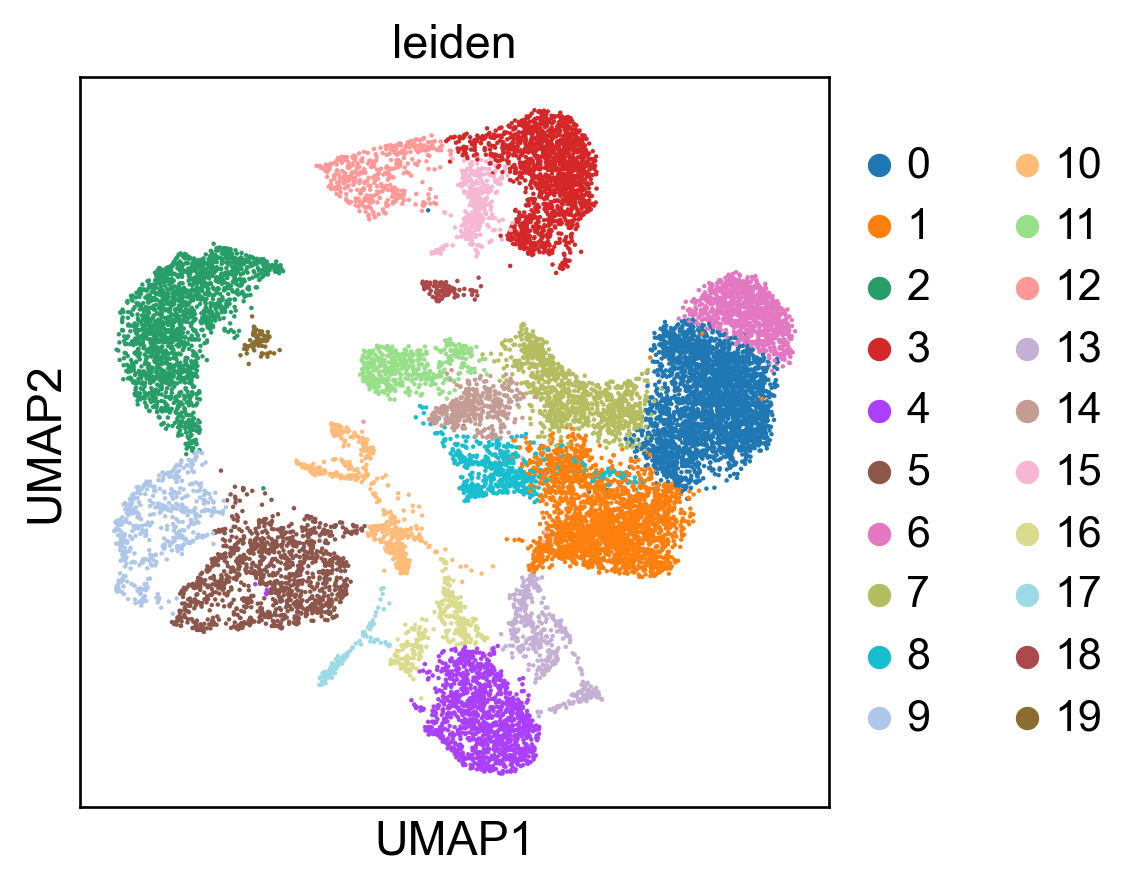

In [13]:
sc.pl.umap(adata, color="leiden")

In [14]:
adata.obs.head()

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,leiden
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103,0
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257,3916,10
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683,15
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4330,17
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,325,8


In [15]:
type(adata.obsm["X_umap"])

numpy.ndarray

In [16]:
umap = pl.from_numpy(adata.obsm["X_umap"], schema=["umap1", "umap2"])

In [17]:
umap

umap1,umap2
f32,f32
15.643094,7.585866
4.867678,2.374877
7.499862,16.16095
2.44145,-2.955914
8.793519,4.503133
…,…
8.7799,4.498272
6.435459,0.713421
2.823752,0.24163


In [18]:
adata.var.head()

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
AL390719.2,False,False,False,5,0.000292,0.000292,99.970803,5.0,1.791759,5,True,0.001001,1.840088,1.211725,0.000380,0.024219
C1QTNF12,False,False,False,62,0.003737,0.003730,99.637956,64.0,4.174387,62,True,0.008604,1.871498,1.274180,0.003594,0.069648
AL162741.1,False,False,False,26,0.001518,0.001517,99.848175,26.0,3.295837,26,True,0.003878,1.944082,1.418505,0.001503,0.046608
LINC01786,False,False,False,23,0.001343,0.001342,99.865693,23.0,3.178054,23,True,0.004039,1.990555,1.510911,0.001524,0.047831
AL391244.2,False,False,False,73,0.004438,0.004428,99.573723,76.0,4.343805,73,True,0.008619,1.879800,1.290687,0.003630,0.068932


In [19]:
adata.obsm

AxisArrays with keys: X_pca, X_umap, X_tsne

In [20]:
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
AL390719.2,False,False,False,5,0.000292,0.000292,99.970803,5.0,1.791759,5,True,0.001001,1.840088,1.211725,0.000380,0.024219
C1QTNF12,False,False,False,62,0.003737,0.003730,99.637956,64.0,4.174387,62,True,0.008604,1.871498,1.274180,0.003594,0.069648
AL162741.1,False,False,False,26,0.001518,0.001517,99.848175,26.0,3.295837,26,True,0.003878,1.944082,1.418505,0.001503,0.046608
LINC01786,False,False,False,23,0.001343,0.001342,99.865693,23.0,3.178054,23,True,0.004039,1.990555,1.510911,0.001524,0.047831
AL391244.2,False,False,False,73,0.004438,0.004428,99.573723,76.0,4.343805,73,True,0.008619,1.879800,1.290687,0.003630,0.068932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRKY,False,False,False,2294,0.165139,0.152840,86.604380,2828.0,7.947679,2289,True,0.346883,1.815441,1.162716,0.162510,0.463308
KDM5D,False,False,False,2030,0.140438,0.131412,88.145985,2405.0,7.785721,2028,True,0.283985,1.810605,1.153101,0.131121,0.414425
TTTY10,False,False,False,265,0.016876,0.016735,98.452555,289.0,5.669881,265,True,0.033677,1.812069,1.156013,0.014633,0.137948
MT-ND2,True,False,False,16324,23.342249,3.192214,4.677372,399736.0,12.898562,15951,True,3.988345,4.379118,1.680991,3.313847,1.351333


In [21]:
adata.var_names

Index(['AL390719.2', 'C1QTNF12', 'AL162741.1', 'LINC01786', 'AL391244.2',
       'TMEM52', 'AL589739.1', 'PLCH2', 'AL513320.1', 'CHD5',
       ...
       'AC244090.3', 'MTCP1', 'TMLHE-AS1', 'AC012078.2', 'PCDH11Y', 'PRKY',
       'KDM5D', 'TTTY10', 'MT-ND2', 'MT-ND5'],
      dtype='object', length=2000)

In [22]:
adata.obs_names

Index(['AAACCCAAGGATGGCT-1', 'AAACCCAAGGCCTAGA-1', 'AAACCCAAGTGAGTGC-1',
       'AAACCCACAAGAGGCT-1', 'AAACCCACATCGTGGC-1', 'AAACCCACATTCTCTA-1',
       'AAACCCAGTCCGCAGT-1', 'AAACCCAGTGCATACT-1', 'AAACCCAGTTGACGGA-1',
       'AAACCCATCGATACTG-1',
       ...
       'TTTGGTTCATGTTACG-1', 'TTTGGTTGTCTCACAA-1', 'TTTGGTTTCCCATTCG-1',
       'TTTGGTTTCCGTCCTA-1', 'TTTGGTTTCTTGCGCT-1', 'TTTGTTGAGAGTCTGG-1',
       'TTTGTTGCAGACAATA-1', 'TTTGTTGCATGTTACG-1', 'TTTGTTGGTAGTCACT-1',
       'TTTGTTGTCGCGCTGA-1'],
      dtype='object', length=16680)

In [23]:
adata.X.shape  # dimension 0 is cells, dimension 1 is genes

(16680, 2000)

In [24]:
adata.write("data/pbmc3k_pped.h5ad")